# Time Series Data section 5
Making datetime index

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
my_year = 2021
my_month = 2
my_day = 10
my_minute = 30
my_mysecond = 15

In [6]:
my_date = datetime(my_year,my_month,my_day)
my_date

datetime.datetime(2021, 2, 10, 0, 0)

In [8]:
firsttwo = [datetime(2021, 2, 10),datetime(2021, 2, 12)]

In [11]:
dt_ind = pd.DatetimeIndex(firsttwo)
dt_ind

DatetimeIndex(['2021-02-10', '2021-02-12'], dtype='datetime64[ns]', freq=None)

In [12]:
data = np.random.randn(2,2)
data

array([[-0.31657993, -0.23499874],
       [ 0.5542967 , -1.38243802]])

In [13]:
cols = ['a','b']

In [14]:
df = pd.DataFrame(data,dt_ind,cols)

In [15]:
df

,a,b
2021-02-10,-0.316580,-0.234999
2021-02-12,0.554297,-1.382438


In [17]:
df.index.argmax() # index at position 1 is the latest date 

1

In [18]:
df.index.argmin() # indexlocation of minimum

0

In [19]:
df.index.min() # gives value at that index

Timestamp('2021-02-10 00:00:00')

# Resampling 
Functions used to help with aggregating by quarter because stocks only sell on weekday so aggregations are off also doesnt account for calander day etc.. 

In [24]:
df = pd.read_csv("walmart_stock.csv")
df # still a string not a datetime object

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...,...
1253,2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
1254,2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
1255,2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
1256,2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456


In [25]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [26]:
# make datetime object
# expects year-month-day 2020-03-25
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [27]:
# Set index as datetime object
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


In [33]:
# index_col makes date column an inded 
# parse dates =true makes the index date time
# This is the faster way!
df = pd.read_csv("walmart_stock.csv",index_col='Date',parse_dates = True)
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


# Resample

In [34]:
# A for year end frequency, Q for quarter end frequency,  Check resampling in section 5 for the notes on this 
df.resample(rule='A') # A = year end frequency


In [35]:
df.resample(rule='A').mean()
# this table means for row 2 column 1 the mean was from 2012-12-31: 2013-12-31  was 75.26

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [36]:
df.resample(rule='Q').mean() # quarterly resampling

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [37]:
df.resample(rule='BQ').mean() # business quarter not including weekend

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [38]:
df.resample(rule='A').max() # get max price per year

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [39]:
def first_day(entry):
    return entry[0]

In [40]:
df.resample('A').apply(first_day) # to get the first value of the first day of year

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


<AxesSubplot:xlabel='Date'>

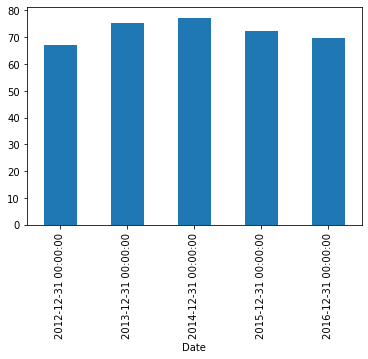

In [41]:
df['Close'].resample('A').mean().plot(kind='bar') # average for each year

<AxesSubplot:xlabel='Date'>

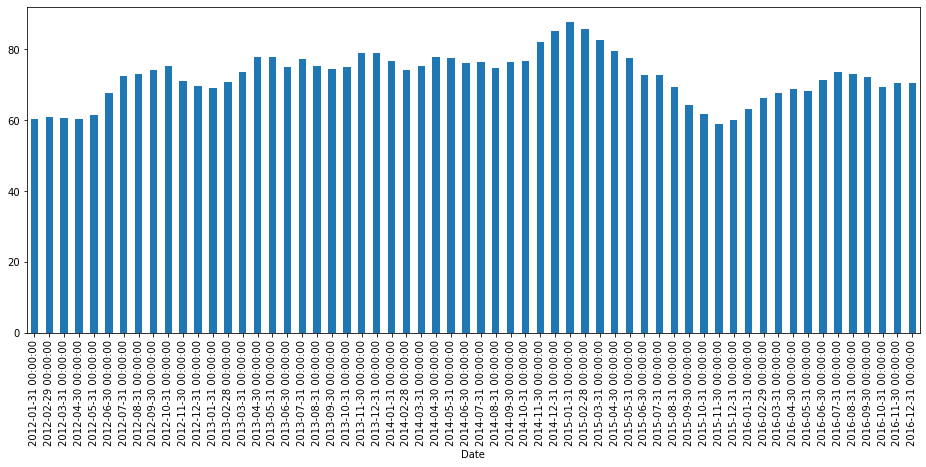

In [43]:
df['Close'].resample('M').mean().plot(kind='bar',figsize=(16,6)) # MONTHLY

<AxesSubplot:xlabel='Date'>

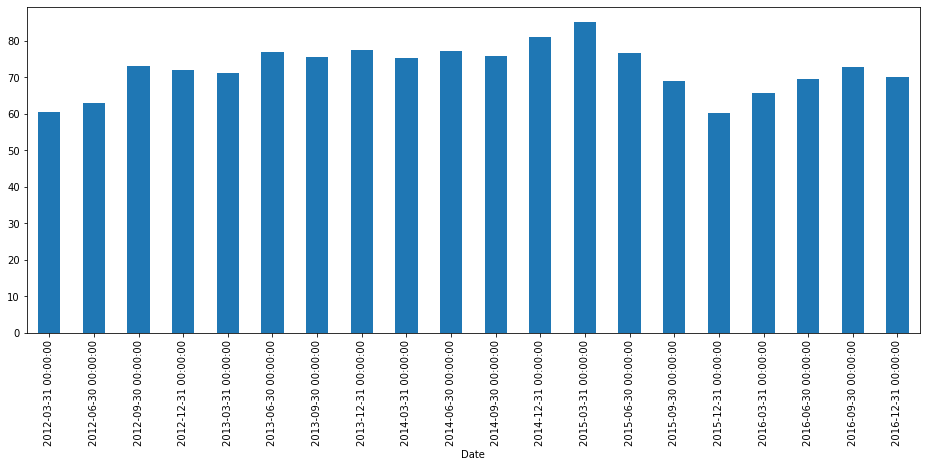

In [44]:
df['Close'].resample('Q').mean().plot(kind='bar',figsize=(16,6)) # MONTHLY

# Time Shifts

In [45]:
df = pd.read_csv("walmart_stock.csv",index_col='Date',parse_dates = True)
df.head()# see it is daily data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [46]:
# LAG or shift the data
# because index is daily period is 1
df.shift(periods =1).head() # shifts everything shifts down 1 or up 1 period

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [47]:
df.shift(periods =-1).head() # shifts everything shifts up 1 or down 1 period

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109


In [48]:
# USING T Shift and frequency argument
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [50]:
df.shift(freq='M').head() # makes everything at the end of the month
# making every date in january the 31st (GROUPBY!!! NO AGGREGATION)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


# Rolling and Expanding!
Rolling Mean

In [51]:
df = pd.read_csv("walmart_stock.csv",index_col='Date',parse_dates = True)
df.head()# see it is daily data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


<AxesSubplot:xlabel='Date'>

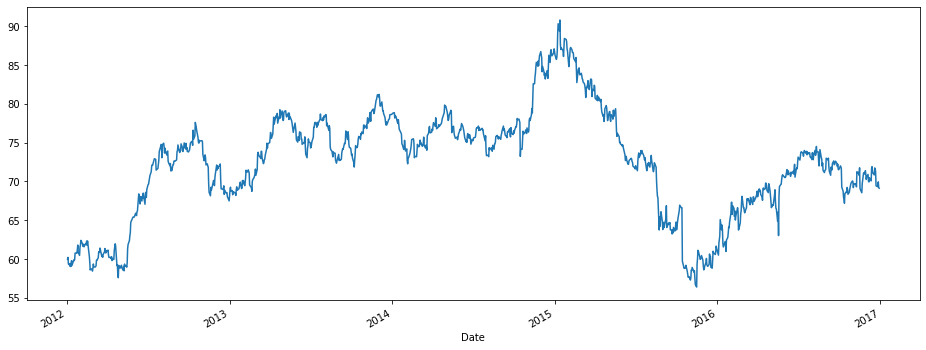

In [54]:
df['Open'].plot(figsize=(16,6)) # Noisey because of daily data

In [55]:
# because index is daily 7 days for 1 week
df.rolling(7).mean().head(15)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

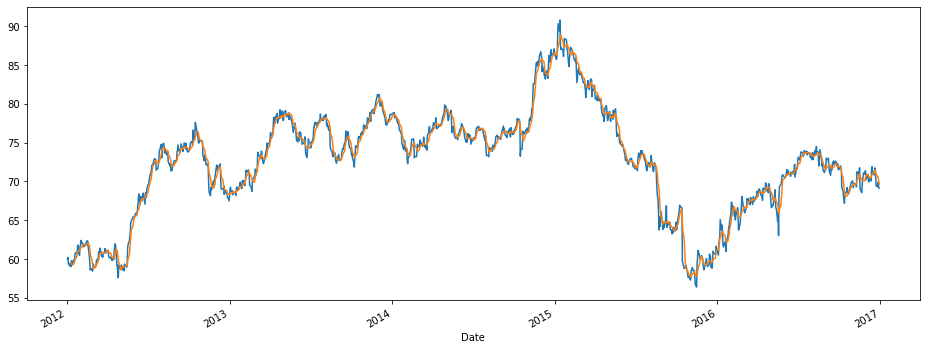

In [57]:
df['Open'].plot()
df.rolling(window=7).mean()['Close'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

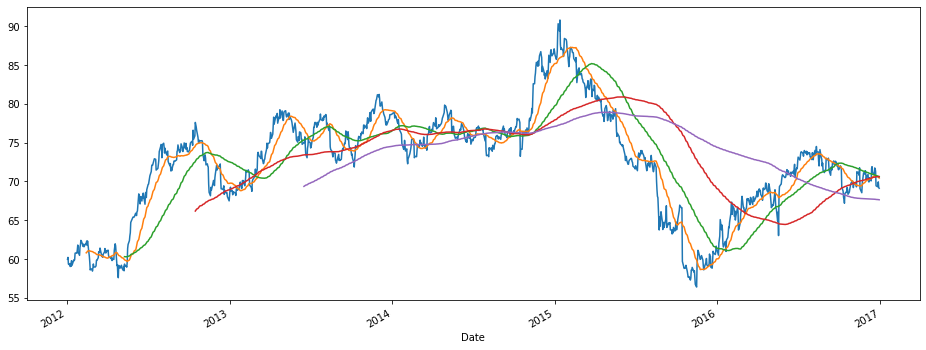

In [61]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))
df.rolling(window=90).mean()['Close'].plot(figsize=(16,6))
df.rolling(window=200).mean()['Close'].plot(figsize=(16,6))
df.rolling(window=365).mean()['Close'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

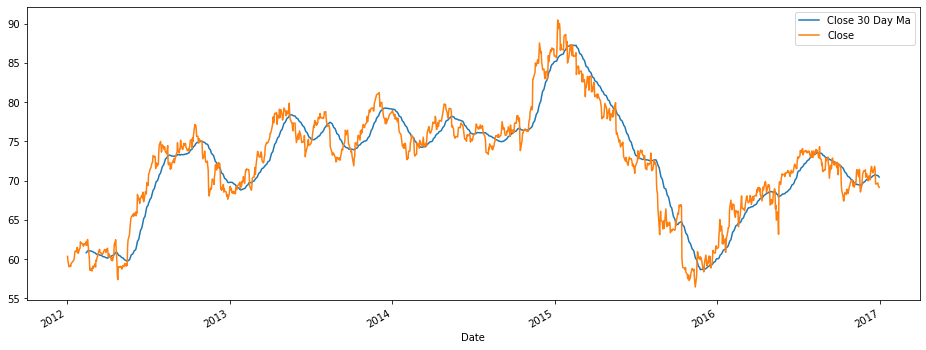

In [63]:
df['Close 30 Day Ma'] = df['Close'].rolling(window=30).mean()
df[['Close 30 Day Ma','Close']].plot(figsize=(16,6))

# Expanding

<AxesSubplot:xlabel='Date'>

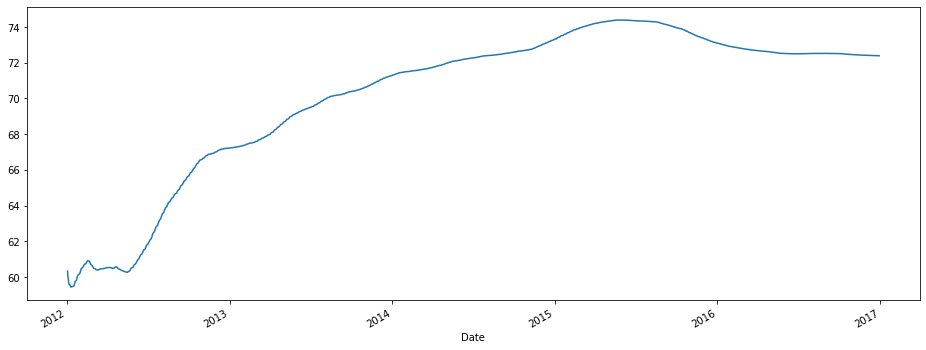

In [64]:
# at each particular time stamp it is the average of everything that came before it 
df['Close'].expanding().mean().plot(figsize=(16,6))
# since the beginning our average price has increased..

# Boliger band

In [65]:
df = pd.read_csv("walmart_stock.csv",index_col='Date',parse_dates = True)
df.head()# see it is daily data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


<AxesSubplot:xlabel='Date'>

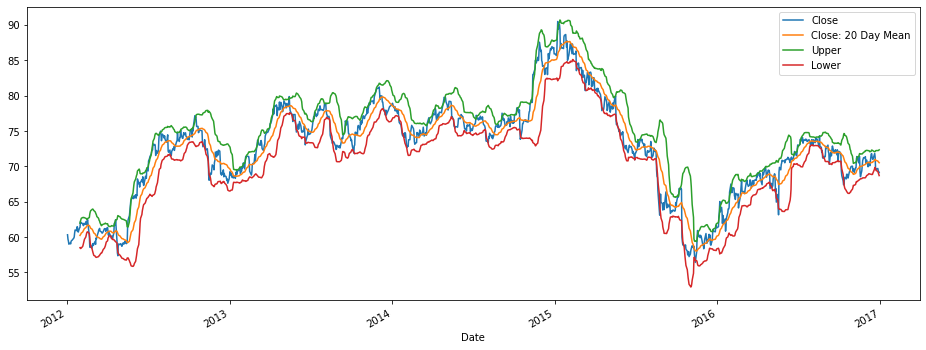

In [67]:
# Close 20 MA 
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()

# Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())

# Upper = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

# Close
df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

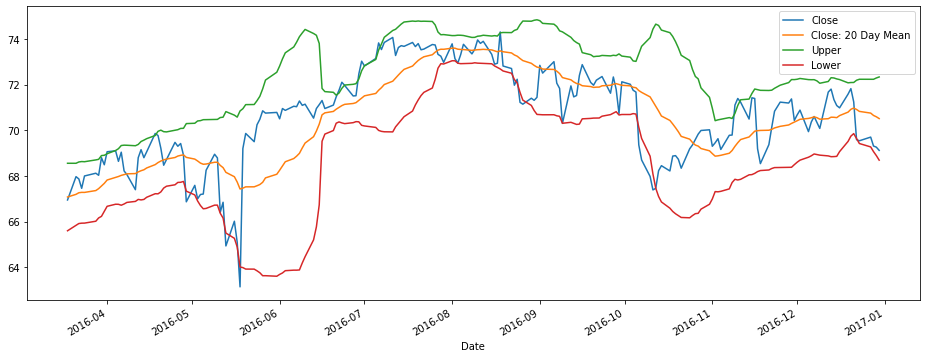

In [68]:
# Get last 200 days
df[['Close','Close: 20 Day Mean','Upper','Lower']].tail(200).plot(figsize=(16,6))